### TASK A: Top 100 word & Zipf's Law

In [36]:
import pandas as pd

# Load the models and brands mapping
mapping_df = pd.read_csv("C:\\Users\\kowsh\\OneDrive\\Documents\\MSBA Coursework\\Unstructed data analytics by Prof Barua\\Assignment 1\\Guidelines\\car_models_and_brands.csv")

# Load the data from Data Scrapper Code
data_df = pd.read_csv("C:\\Users\\kowsh\\OneDrive\\Documents\\MSBA Coursework\\Unstructed data analytics by Prof Barua\\Assignment 1\\oldposts_data.csv")

# Create a dictionary for mapping models to brands
model_to_brand = {}
for _, row in mapping_df.iterrows():
    brand = row['Brand']
    models = row['Model'].split('|')
    for model in models:
        model_to_brand[model] = brand

model_to_brand['330i'] = 'bmw'
model_to_brand['325i'] = 'bmw'
model_to_brand['rx'] = 'lexus'
model_to_brand['ls'] = 'lexus'
model_to_brand['gs'] = 'lexus'
model_to_brand['es'] = 'lexus'
model_to_brand['g35'] = 'infiniti'

del model_to_brand['mercedes']

model_to_brand['volkswagen'] = model_to_brand.pop('volkwagen')

brand_fil = list(set(model_to_brand.values()))

# model_to_brand['s4'] = 'audi'
# model_to_brand['tlx'] = 'acura'
# model_to_brand['daytona'] = 'dodge'
# model_to_brand['wrangler'] = 'jeep'

In [37]:
rem_brand = ["car","seat","sedan","problem"]

brand_fil = [word for word in brand_fil if word not in rem_brand]
print(brand_fil)
data_df

['chrysler', 'cadillac', 'buick', 'pontiac', 'mercedes', 'hyundai.', 'hyndai kia', 'acura', 'mitsubishi', 'toyata', 'lincoln', 'nissan.', 'volkwagen', 'volkswagen', 'saturn', 'kia', 'ford', 'bmw', 'suzuki', 'lexus', 'audi', 'chevrolet', 'nissan', 'kia.', 'mercury', 'honda', 'dodge', 'hyundai', 'subaru', 'toyota', 'hyundai,', 'volvo', 'infiniti', 'mazda']


,Unnamed: 0,User_ID,Date,Comment
0,0,merc1,Mar-02,I personally think that with a few tweaks the ...
1,1,fredvh,Mar-02,I am debating a new purchase and these two are...
2,2,blueguydotcom,Mar-02,"Great handling, RWD, excellent engine and the ..."
3,3,hungrywhale,Mar-02,And no manual tranny. That may not matter to y...
4,4,riez,Mar-02,One beauty of BMW 3 Series is that there are s...
...,...,...,...,...
5980,5980,brightness04,Oct-06,"When I bought in 1988, fixed mortgage rates we..."
5981,5981,qbrozen,Oct-06,You won't get an argument from me.\n\nI'd neve...
5982,5982,qbrozen,Oct-06,"As Rocky point out, this is about SEDANS. Last..."
5983,5983,rockylee,Oct-06,"Rocky, I don't know how you get these ridiculo..."


In [38]:
data_df = data_df.drop(columns='Unnamed: 0')

In [39]:
data_df.head()

,User_ID,Date,Comment
0,merc1,Mar-02,I personally think that with a few tweaks the ...
1,fredvh,Mar-02,I am debating a new purchase and these two are...
2,blueguydotcom,Mar-02,"Great handling, RWD, excellent engine and the ..."
3,hungrywhale,Mar-02,And no manual tranny. That may not matter to y...
4,riez,Mar-02,One beauty of BMW 3 Series is that there are s...


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Extract the comment column
comments = data_df[data_df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']

# Tokenize and preprocess the comments (remove punctuation and convert to lowercase)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    return list(set(words))

# Tokenize and preprocess the comments
all_words = []
for comment in comments:
    words = preprocesstext(comment)
    all_words.extend(words)

# Calculate word frequencies
word_frequencies = pd.Series(all_words).value_counts()

In [41]:
print(word_frequencies)

the             5160
a               4385
and             4155
to              4127
i               3961
                ... 
flakes             1
eaten              1
rumblings          1
banglization       1
unpractical        1
Length: 22936, dtype: int64


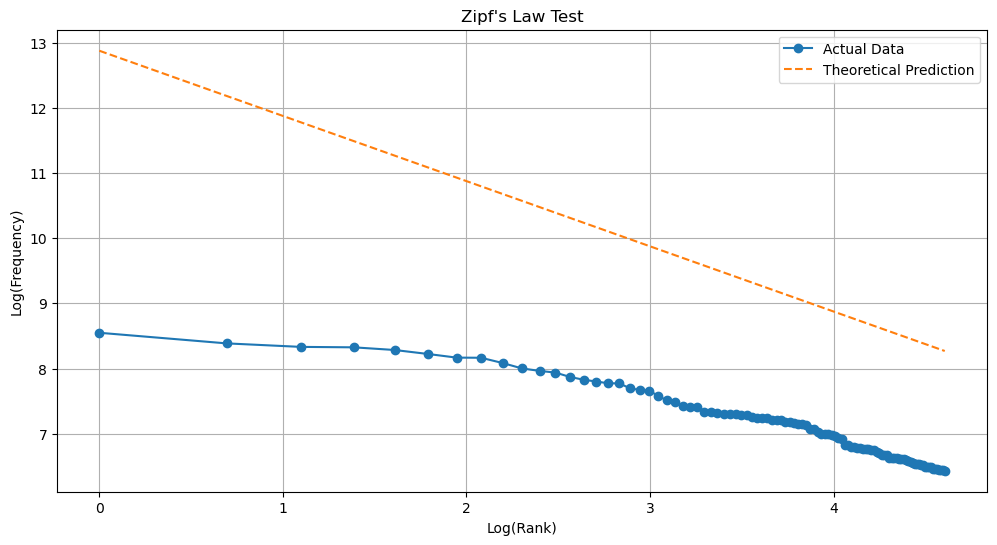

In [42]:
# Calculate word frequencies
word_frequencies = pd.Series(all_words).value_counts()

# Rank words by frequency
ranks = np.arange(1, len(word_frequencies) + 1)

# Calculate the theoretical prediction for Zipf's Law
total_words = len(all_words)
theoretical_freq = total_words / ranks

# Plot the most common 100 words and the theoretical prediction
top_100_words = word_frequencies.head(100)
top_100_ranks = np.arange(1, 101)  # Adjust the ranks to match the top 100 words
plt.figure(figsize=(12, 6))
plt.plot(np.log(top_100_ranks), np.log(top_100_words.values), marker='o', label='Actual Data')
plt.plot(np.log(ranks[:100]), np.log(theoretical_freq[:100]), linestyle='--', label='Theoretical Prediction')
plt.title("Zipf's Law Test")
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.legend()
plt.grid(True)
plt.show()

### TASK B: Word frequency table after removing stop words

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (you only need to do this once)
nltk.download('stopwords')

# Extract the comment column
comments = data_df[data_df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']

# Get the NLTK English stop words
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the comments (remove punctuation, convert to lowercase, and remove stop words)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    nswords = [word for word in words if word not in stop_words]
    nswords = [model_to_brand.get(word, word) for word in nswords]
    return list(set(nswords))

# Tokenize and preprocess the comments, removing stop words
words_nostop = []
for comment in comments:
    words = preprocesstext(comment)
    words_nostop.extend(words)

# Calculate word frequencies
words_nostop_freq = pd.Series(words_nostop).value_counts()

wnf_df = pd.DataFrame(words_nostop_freq)
wnf_df = wnf_df.reset_index()
wnf_df = wnf_df.rename(columns={'index': 'words', 0: 'frequency'})

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kowsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\kowsh\AppData\Local\Temp\ipykernel_14244\2062774763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bd_df['words'] = top_bd_df['words'].replace(key_b)


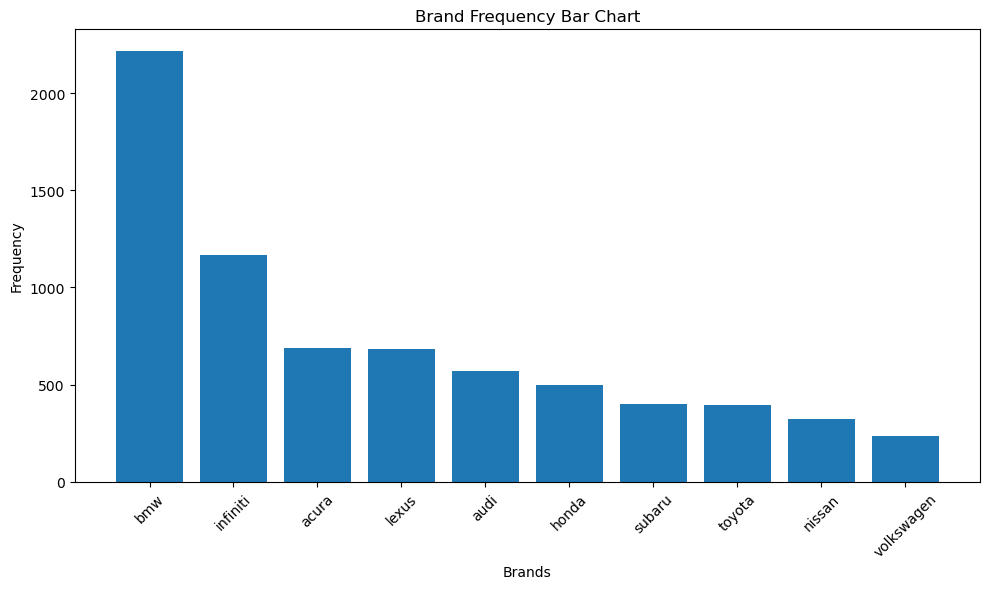

In [44]:
top_bd_df = wnf_df[wnf_df['words'].isin(brand_fil)]
key_b = {"volkwagen":"volkswagen", "mercedes-benz":"mercedes"}
top_bd_df['words'] = top_bd_df['words'].replace(key_b)
top_bd_df_f = top_bd_df.groupby("words").sum().reset_index().sort_values(by='frequency',ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(top_bd_df_f['words'].head(10), top_bd_df_f['frequency'].head(10))
plt.xlabel('Brands')
plt.ylabel('Frequency')
plt.title('Brand Frequency Bar Chart')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [45]:
top_10_df = top_bd_df_f.head(10)
top_10_df

,words,frequency
2,bmw,2217
12,infiniti,1167
0,acura,688
14,lexus,685
1,audi,568
9,honda,496
23,subaru,403
25,toyota,397
20,nissan,322
26,volkswagen,238


### TASK C: LIFT Analysis

In [46]:
token_df = pd.DataFrame(comments)
token_df['Tokenized_Message'] = token_df['Comment'].map(preprocesstext)

def replace_words_in_list(word_list, replacements):
    ls = [replacements.get(word, word) for word in word_list]
    return list(set(ls))

token_df['Mapped_words'] = token_df['Tokenized_Message'].apply(lambda x: replace_words_in_list(x, model_to_brand))


In [47]:
word_distance = 15

def distance_thresh(words_list, word1, word2, max_distance):
    indices_word1 = [i for i, word in enumerate(words_list) if word == word1]
    indices_word2 = [i for i, word in enumerate(words_list) if word == word2]
    for idx1 in indices_word1:
        for idx2 in indices_word2:
            if abs(idx1 - idx2) <= max_distance:
                return True
    return False

def lift_analysis(data,word_A,word_B,max_distance):
    if (word_A == word_B):
        return '-'
    else:
        N = data.shape[0]
        N_A = sum(1 for review in data if word_A in review)
        N_B = sum(1 for review in data if word_B in review)
        N_A_and_B = sum(1 for review in data if distance_thresh(review, word_A, word_B, max_distance) and word_A in review and word_B in review)
    
        lift = (N * N_A_and_B) / (N_A * N_B)

        return np.round(lift,4)

df_lift = []

for index, brand1 in top_10_df.iterrows():
    for index,brand2 in top_10_df.iterrows():
        df_lift.append(lift_analysis(token_df['Mapped_words'],brand1['words'],brand2['words'],word_distance))


In [48]:
import numpy as np
lift_np = np.reshape(df_lift,(10,10))
lift_df = pd.DataFrame(data= lift_np)
for i in range(10):
    lift_df = lift_df.rename(columns = {i: top_10_df.iloc[i, 0]})
    lift_df = lift_df.rename(index = {i: top_10_df.iloc[i, 0]})
lift_df


,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,-,0.2521,1.1065,1.0089,0.9933,0.3538,0.4488,0.2924,0.5701,1.3418
infiniti,0.2521,-,0.1267,0.846,0.3341,1.1891,0.6236,0.6072,0.6212,0.091
acura,1.1065,0.1267,-,1.2064,0.873,0.2982,1.1225,0.0876,0.4593,1.6986
lexus,1.0089,0.846,1.2064,-,1.0922,1.0041,0.3469,1.2104,0.597,0.6721
audi,0.9933,0.3341,0.873,1.0922,-,0.3611,0.3922,0.5308,1.3089,2.0575
honda,0.3538,1.1891,0.2982,1.0041,0.3611,-,0.5689,2.8875,2.2109,0.4998
subaru,0.4488,0.6236,1.1225,0.3469,0.3922,0.5689,-,0.5611,0.6457,0.5273
toyota,0.2924,0.6072,0.0876,1.2104,0.5308,2.8875,0.5611,-,3.09,0.6244
nissan,0.5701,0.6212,0.4593,0.597,1.3089,2.2109,0.6457,3.09,-,1.7597
volkswagen,1.3418,0.091,1.6986,0.6721,2.0575,0.4998,0.5273,0.6244,1.7597,-


### Task D: MDS Plot

In [49]:
lift_df = lift_df.replace(to_replace='-',value=1)
lift_df = lift_df.astype(float)
lift_df

,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,1.0000,0.2521,1.1065,1.0089,0.9933,0.3538,0.4488,0.2924,0.5701,1.3418
infiniti,0.2521,1.0000,0.1267,0.8460,0.3341,1.1891,0.6236,0.6072,0.6212,0.0910
acura,1.1065,0.1267,1.0000,1.2064,0.8730,0.2982,1.1225,0.0876,0.4593,1.6986
lexus,1.0089,0.8460,1.2064,1.0000,1.0922,1.0041,0.3469,1.2104,0.5970,0.6721
audi,0.9933,0.3341,0.8730,1.0922,1.0000,0.3611,0.3922,0.5308,1.3089,2.0575
honda,0.3538,1.1891,0.2982,1.0041,0.3611,1.0000,0.5689,2.8875,2.2109,0.4998
subaru,0.4488,0.6236,1.1225,0.3469,0.3922,0.5689,1.0000,0.5611,0.6457,0.5273
toyota,0.2924,0.6072,0.0876,1.2104,0.5308,2.8875,0.5611,1.0000,3.0900,0.6244
nissan,0.5701,0.6212,0.4593,0.5970,1.3089,2.2109,0.6457,3.0900,1.0000,1.7597
volkswagen,1.3418,0.0910,1.6986,0.6721,2.0575,0.4998,0.5273,0.6244,1.7597,1.0000


In [50]:
from sklearn.manifold import MDS

def invert_value(x):
    if x == 0:
        return np.NaN
    return 1/x

lift_df_inv = lift_df.applymap(invert_value)

lift_df_inv = lift_df_inv.replace(to_replace=np.NaN,value=200)

for i in range(len(lift_df_inv)):
    for j in range(len(lift_df_inv)):
            lift_df_inv.iloc[i, j] = lift_df_inv.iloc[i, j] ** 0.2  ## Scaled values to get better MDS distances


lift_df_inv

,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,1.000000,1.317302,0.979963,0.998229,1.001345,1.230973,1.173787,1.278806,1.118948,0.942893
infiniti,1.317302,1.000000,1.511627,1.034013,1.245159,0.965954,1.099053,1.104927,1.099901,1.615071
acura,0.979963,1.511627,1.000000,0.963167,1.027536,1.273792,0.977153,1.627418,1.168371,0.899460
lexus,0.998229,1.034013,0.963167,1.000000,0.982516,0.999182,1.235831,0.962530,1.108677,1.082713
audi,1.001345,1.245159,1.027536,0.982516,1.000000,1.225955,1.205864,1.135047,0.947586,0.865629
honda,1.230973,0.965954,1.273792,0.999182,1.225955,1.000000,1.119419,0.808901,0.853269,1.148790
subaru,1.173787,1.099053,0.977153,1.235831,1.205864,1.119419,1.000000,1.122514,1.091425,1.136550
toyota,1.278806,1.104927,1.627418,0.962530,1.135047,0.808901,1.122514,1.000000,0.798010,1.098772
nissan,1.118948,1.099901,1.168371,1.108677,0.947586,0.853269,1.091425,0.798010,1.000000,0.893125
volkswagen,0.942893,1.615071,0.899460,1.082713,0.865629,1.148790,1.136550,1.098772,0.893125,1.000000


In [51]:
#perform multi-dimensional scaling
mds = MDS(random_state=0)
scaled_df = mds.fit_transform(lift_df_inv)


c:\Users\kowsh\anaconda3\envs\DatasScienceProgrammingwithPy\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
c:\Users\kowsh\anaconda3\envs\DatasScienceProgrammingwithPy\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


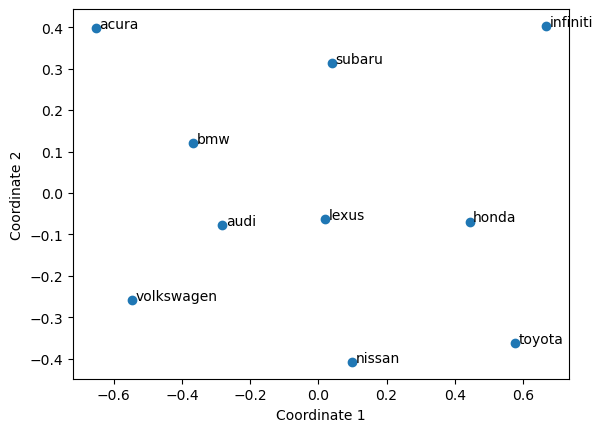

In [52]:
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(scaled_df[:,0], scaled_df[:,1])

#add axis labels
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')

#add lables to each point
for i, txt in enumerate(top_10_df['words']):
    plt.annotate(txt, (scaled_df[:,0][i]+.01, scaled_df[:,1][i]))

#display scatterplot
plt.show()

### Task F: Attributes

performance, luxury, price, engine, handling, interior, power, sport, hp, awd, rwd, fwd, speed, torque

In [53]:
#top_5_attr = ['sport','luxury','hybrid','speed','performance','price','engine','premium','cost','power','interior','hp','awd','rwd','fwd','torque']
top_5_attr = ['sport','luxury','hybrid','speed','performance','engine','premium','cost','power','interior','safety']
top_5_attr_df = wnf_df[wnf_df['words'].isin(top_5_attr)]
top_5_attr_df = top_5_attr_df.rename(columns={0: 'frequency'})

top_5_attr_df

,words,frequency
18,performance,797
38,luxury,585
43,engine,517
63,interior,430
64,power,427
78,sport,381
130,speed,290
230,cost,196
374,premium,131
469,safety,109


In [54]:

df_lift_attr = []

for index, brand1 in top_10_df.iterrows():
    for index, attr in top_5_attr_df.iterrows():
        df_lift_attr.append(lift_analysis(token_df['Mapped_words'],brand1['words'],attr['words'],word_distance))

In [55]:
lift_attr_np = np.reshape(df_lift_attr,(11,10))
lift_attr_df = pd.DataFrame(data= lift_attr_np)
for i in range(10):
    lift_attr_df = lift_attr_df.rename(columns = {i: top_10_df.iloc[i, 0]})
    lift_attr_df = lift_attr_df.rename(index = {i: top_5_attr_df.iloc[i, 0]})
lift_attr_df

for col in lift_attr_df.columns:
    print(col,":", lift_attr_df[col].nlargest(4).index.values)

print(row.index,":",lift_attr_df.idxmax())

bmw : ['power' 'cost' 'luxury' 10]
infiniti : ['safety' 'speed' 'luxury' 'power']
acura : ['interior' 10 'speed' 'safety']
lexus : ['power' 'performance' 'engine' 10]
audi : ['safety' 'performance' 'interior' 'engine']
honda : ['speed' 10 'power' 'engine']
subaru : ['premium' 'performance' 'speed' 'interior']
toyota : ['premium' 'safety' 'power' 'performance']
nissan : ['interior' 'power' 'engine' 'safety']
volkswagen : ['premium' 'speed' 'safety' 'engine']
Index(['Brand', 'Model'], dtype='object') : bmw              power
infiniti        safety
acura         interior
lexus            power
audi            safety
honda            speed
subaru         premium
toyota         premium
nissan        interior
volkswagen     premium
dtype: object


In [56]:
top_5_attr = ['sport','luxury','hybrid','speed','performance','engine','premium','cost','power','interior']
#Updated after change in data structure - USE THIS - >> performance, luxury, price, engine, handling, interior, power, sport, hp, awd, rwd, fwd, speed, torque

Analysis of Outcomes : 

1. Volkswagon seems to be associated with the luxury car brands - bmw, lexus and audi. 

Across brands, which brand stands for which attribute? 

bmw              power

infiniti        safety

acura         interior

lexus            power

audi            safety

honda            speed

subaru         premium

toyota         premium

nissan        interior

volkswagen     premium

bmw : ['power' 'cost' 'luxury' 10]
lexus : ['power' 'performance' 'engine' 10]
audi : ['safety' 'performance' 'interior' 'engine']  ---> I get to drive a car with a lot of safety features while also signalling a brand premium
volkswagen : ['premium' 'speed' 'safety' 'engine']


infiniti : ['safety' 'speed' 'luxury' 'power']

acura : ['interior' 10 'speed' 'safety']

subaru : ['premium' 'performance' 'speed' 'interior']

honda : ['speed' 10 'power' 'engine']
toyota : ['premium' 'safety' 'power' 'performance'] ---> (power, performance/engine)
nissan : ['interior' 'power' 'engine' 'safety']



